In [1]:
#!pip install pandas

In [2]:
#!pip install matplotlib
#!pip install pandas_datareader
#!pip install yfinance

In [3]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [4]:
# loading dataset
df = yf.Ticker('TSLA')
df = df.history(period ='max')

In [5]:
# showing up a data
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
df.tail

<bound method NDFrame.tail of                                  Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2023-03-06 00:00:00-05:00  198.539993  198.600006  192.300003  193.809998   
2023-03-07 00:00:00-05:00  191.380005  194.199997  186.100006  187.710007   
2023-03-08 00:00:00-05:00  185.039993  186.500000  180.000000  182.000000   
2023-03-09 00:00:00-05:00  180.250000  185.179993  172.509995  172.919998   
2023-03-10 00:00:00-05:00  175.130005  178.289

In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Cleaning and visualizing our stock market data

In [8]:
df = df.drop(['Date','Dividends', 'Stock Splits'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


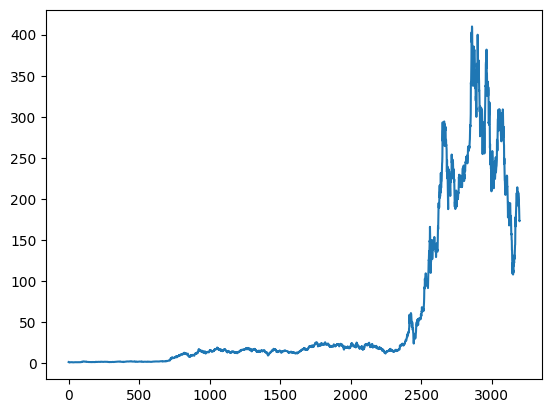

In [9]:
plt.plot(df.Close)

In [10]:
# Applying a 100 days moving average
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3192    177.7669
3193    177.4790
3194    177.1266
3195    176.6386
3196    176.3231
Name: Close, Length: 3197, dtype: float64

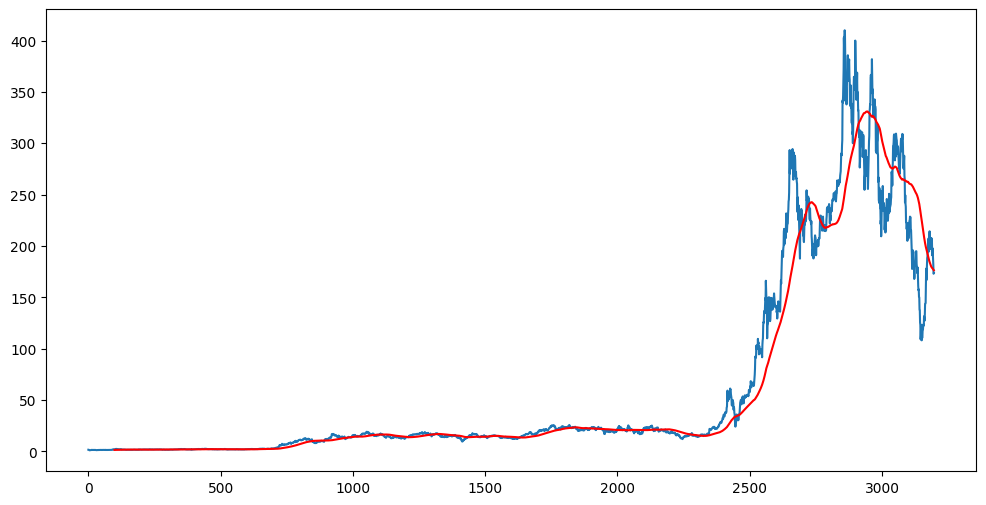

In [11]:
#plotting a data & average
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
# Applying a 200 days moving average
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3192    220.357884
3193    220.113417
3194    219.841050
3195    219.599150
3196    219.341517
Name: Close, Length: 3197, dtype: float64

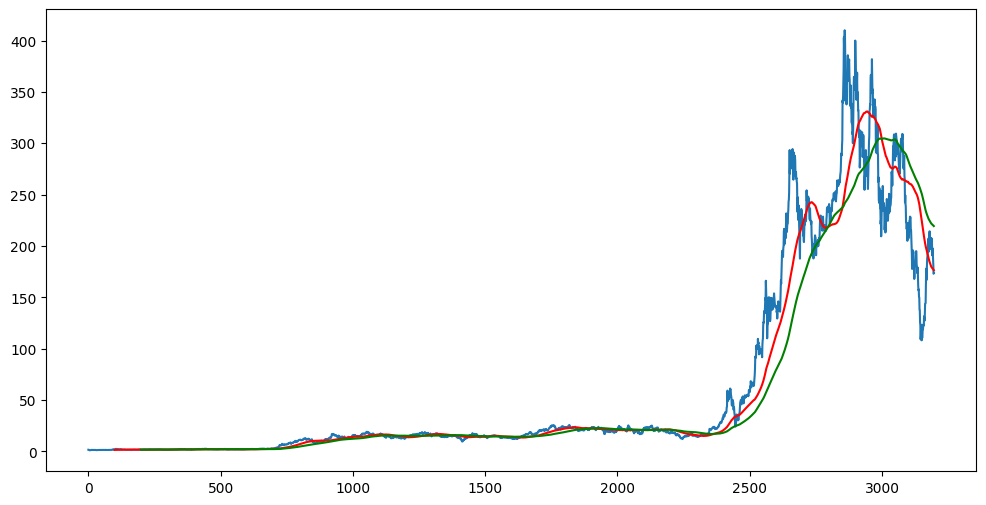

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(3197, 5)

# Spliting a data into training & testing

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2237, 1)
(960, 1)


In [16]:
data_training.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [17]:
data_testing.head()

,Close
2237,13.690667
2238,13.672000
2239,12.848667
2240,13.032667
2241,12.708667


In [18]:
# !pip install scikit-learn

# Feature Scaling

In [19]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.585455  ],
       [0.57565003],
       [0.52879199]])

In [21]:
data_training_array.shape

(2237, 1)

In [22]:
X_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  X_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
#!pip3 install keras

In [24]:
#!pip install -U tensorflow

In [25]:
#ML Model
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences = True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train, y_train, epochs=50)

Epoch 1/50
67/67 [==============================] - 21s 180ms/step - loss: 0.0563
Epoch 2/50
67/67 [==============================] - 16s 237ms/step - loss: 0.0125
Epoch 3/50
67/67 [==============================] - 19s 284ms/step - loss: 0.0104
Epoch 4/50
67/67 [==============================] - 17s 257ms/step - loss: 0.0107
Epoch 5/50
67/67 [==============================] - 23s 337ms/step - loss: 0.0101
Epoch 6/50
67/67 [==============================] - 23s 339ms/step - loss: 0.0089
Epoch 7/50
67/67 [==============================] - 16s 245ms/step - loss: 0.0092
Epoch 8/50
67/67 [==============================] - 17s 250ms/step - loss: 0.0070
Epoch 9/50
67/67 [==============================] - 17s 250ms/step - loss: 0.0087
Epoch 10/50
67/67 [==============================] - 17s 253ms/step - loss: 0.0077
Epoch 11/50
67/67 [==============================] - 17s 251ms/step - loss: 0.0074
Epoch 12/50
67/67 [==============================] - 17s 250ms/step - loss: 0.0076
Epoch 13/50
6

In [29]:
# model.save('keras_model.h5')

In [30]:
data_testing.head()

,Close
2237,13.690667
2238,13.672000
2239,12.848667
2240,13.032667
2241,12.708667


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [33]:
final_df.head()

,Close
0,19.692667
1,21.739332
2,21.075333
3,22.257999
4,22.186666


In [34]:
imput_data = scaler.fit_transform(final_df)
imput_data

array([[0.01949895],
       [0.02464082],
       [0.02297264],
       ...,
       [0.4272667 ],
       [0.40445484],
       [0.40576126]])

In [35]:
imput_data.shape

(1060, 1)

In [36]:
X_test = []
y_test = []

for i in range(100, imput_data.shape[0]):
  X_test.append(imput_data[i-100: i])
  y_test.append(imput_data[i, 0])

In [37]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [38]:
print(X_test.shape)
print(y_test.shape)

(960, 100, 1)
(960,)


# Prediction making

In [39]:
y_predicted = model.predict(X_test)
y_predicted.shape

30/30 [==============================] - 7s 89ms/step


(960, 1)

In [40]:
y_test

array([0.00442001, 0.00437311, 0.00230464, 0.0027669 , 0.00195291,
       0.00162966, 0.00182395, 0.00154927, 0.00103675, 0.        ,
       0.00245035, 0.00295114, 0.00451882, 0.00427597, 0.00567952,
       0.00638632, 0.00507321, 0.00585203, 0.00602119, 0.00771449,
       0.00766592, 0.00794898, 0.00680838, 0.00718356, 0.00748169,
       0.00683184, 0.00674976, 0.0073477 , 0.00745154, 0.00807292,
       0.0076341 , 0.0093676 , 0.00906612, 0.00860386, 0.00855696,
       0.0100409 , 0.00998731, 0.01107263, 0.01248288, 0.01229529,
       0.01271066, 0.01248957, 0.01326672, 0.012848  , 0.01360002,
       0.01438889, 0.00834928, 0.00821864, 0.00951332, 0.01060031,
       0.01049144, 0.00919174, 0.00927381, 0.00826553, 0.00867253,
       0.00911972, 0.00993706, 0.00938602, 0.0083811 , 0.00938435,
       0.00680838, 0.00614178, 0.00686198, 0.00801597, 0.00785351,
       0.00701105, 0.00723213, 0.00543163, 0.00603459, 0.0058805 ,
       0.00613341, 0.00715844, 0.00781164, 0.00771115, 0.00698

In [41]:
y_predicted

array([[0.04345667],
       [0.04338337],
       [0.04331571],
       [0.0432459 ],
       [0.04316899],
       [0.04307967],
       [0.04297322],
       [0.04284786],
       [0.04270503],
       [0.04254594],
       [0.04237258],
       [0.04218906],
       [0.04200116],
       [0.04181609],
       [0.04164119],
       [0.04148601],
       [0.04135802],
       [0.04126354],
       [0.04120424],
       [0.04118299],
       [0.04119962],
       [0.04125588],
       [0.04135042],
       [0.0414792 ],
       [0.04163706],
       [0.04181905],
       [0.04201852],
       [0.04222865],
       [0.04244198],
       [0.04265121],
       [0.04285061],
       [0.04303545],
       [0.04320276],
       [0.04334983],
       [0.04347587],
       [0.04357919],
       [0.04365945],
       [0.04371834],
       [0.04375774],
       [0.04378134],
       [0.04379544],
       [0.04380479],
       [0.04381537],
       [0.04383299],
       [0.04386283],
       [0.04390742],
       [0.04395875],
       [0.044

In [42]:
scaler.scale_

array([0.00251232])

In [43]:
scale_factor = 1/0.00251232

In [44]:
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

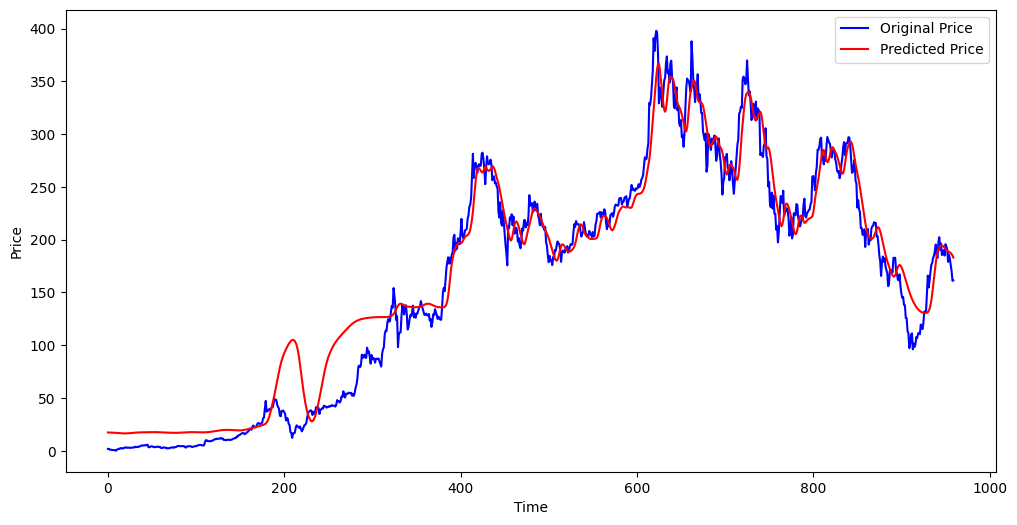

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()